# 〰️ Phase 1, Week 4: Quantum Tunneling (1D Barrier) 〰️

Welcome to Week 4! This week, we're diving into **Quantum Tunneling**, a truly counter-intuitive phenomenon that has no direct equivalent in our everyday classical world.

### What is Quantum Tunneling?

In classical physics, if a ball doesn't have enough energy to roll over a hill, it simply rolls back. It cannot pass through the hill. However, in the quantum world, microscopic particles (like electrons, protons, or even atoms) can sometimes "tunnel" *through* a potential energy barrier, even if their kinetic energy is less than the barrier's height. It's as if they can "borrow" energy for a short time or simply appear on the other side.

This phenomenon is a direct consequence of the wave-like nature of matter. Quantum particles are described by wave functions, and these wave functions don't abruptly drop to zero at a classical barrier. Instead, they exponentially decay *within* the barrier and, if the barrier is thin enough, they still have a non-zero amplitude on the other side. A non-zero amplitude means there's a non-zero probability of finding the particle there.

### Key Concepts:

1.  **Tunneling:**
    * The act of a quantum particle penetrating through a potential energy barrier despite not having sufficient classical energy to overcome it.
    * It's a probabilistic event; we can only calculate the *probability* of tunneling, not guarantee it for a single particle.

2.  **Barrier Potential:**
    * This is the "hill" or obstacle that the quantum particle encounters. Mathematically, it's represented as a region where the potential energy ($V(x)$) is higher than the particle's total energy ($E$).
    * For a 1D barrier, we often simplify it as a rectangular potential barrier: a region of constant, elevated potential energy over a certain width.

3.  **Probability Amplitude (and Tunneling Probability):**
    * The behavior of a quantum particle is described by its **wave function ($\Psi(x)$)**. The square of the magnitude of the wave function ($|\Psi(x)|^2$) gives the **probability density** of finding the particle at a certain position $x$.
    * When a particle encounters a barrier, its wave function extends into and beyond the barrier. The non-zero amplitude of the wave function *after* the barrier implies a **transmission probability** ($T$).
    * The **transmission probability ($T$)** is the probability that the particle will tunnel through the barrier. It depends on several factors:
        * **Barrier Height:** T decreases exponentially with increasing barrier height.
        * **Barrier Width:** T decreases exponentially with increasing barrier width.
        * **Particle Mass:** T decreases exponentially with increasing particle mass (heavier particles are less likely to tunnel).
        * **Energy Difference:** The smaller the difference between the particle's energy and the barrier's height, the higher the tunneling probability.

### Mathematical Insight (for a 1D Square Barrier):

For a simple 1D square potential barrier, the transmission coefficient $T$ (the probability of tunneling) can be approximated by:

$$T \approx e^{-2 \kappa L}$$

Where:
* $L$ is the width of the barrier.
* $\kappa = \frac{\sqrt{2m(V_0 - E)}}{\hbar}$ is the decay constant within the barrier.
    * $m$ is the mass of the particle.
    * $V_0$ is the height of the potential barrier.
    * $E$ is the total energy of the particle.
    * $\hbar$ (h-bar) is the reduced Planck constant ($h / 2\pi$).

This exponential decay is why tunneling probability drops very rapidly for wider, taller barriers or heavier particles.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- 1. Define the Schrödinger Equation for a Free Particle ---
# In 1D, for a free particle (V=0), the time-independent Schrödinger Equation is:
# Defines the 1D time-independent Schrödinger equation (TISE) for a free particle (V=0) in dimensionless units.

#     psi_vec: [psi(x), dpsi/dx] - the state vector at position x
#     x: Position (not used in V=0 case, but included for interface compatibility)
#     E: Energy eigenvalue (dimensionless, in units where hbar=1, m=1)

#     Returns:
#     d(psi_vec)/dx: Derivatives [dpsi/dx, d^2psi/dx^2]

def schrodinger_equation(psi_vec, x, E):
    """Defines the 1D time-independent Schrödinger equation for odeint.
    psi_vec = [psi(x), d(psi)/dx]
    """
    psi = psi_vec[0]
    dpsi_dx = psi_vec[1]
    d2psi_dx2 = -2 * E * psi # For V=0
    return [dpsi_dx, d2psi_dx2]

# --- 2. Simulating a Particle Encountering a Potential Barrier ---

# Constants (for simplicity, often set to 1 in quantum mechanics simulations)
hbar = 1.0 # Reduced Planck constant
m = 1.0    # Mass of the particle

def schrodinger_with_barrier(psi_vec, x_current, E, V_array, x_points_array):
    """Defines the 1D time-independent Schrödinger equation with potential V(x).
    V_array: the array of potential values V(x)
    x_points_array: the array of x-coordinates corresponding to V_array
    x_current: the current x-coordinate odeint is solving for
    """
    psi = psi_vec[0]
    dpsi_dx = psi_vec[1]
    
    # Look up the potential V_x at the current x_current using interpolation
    # This is crucial because odeint evaluates at arbitrary x_current points
    V_x = np.interp(x_current, x_points_array, V_array)
    
    # d^2(psi)/dx^2 = (2m/hbar^2) * (V(x) - E) * psi
    d2psi_dx2 = (2 * m / hbar**2) * (V_x - E) * psi
    return [dpsi_dx, d2psi_dx2]


#### Importance of ```schrodinger_equation``` & ```schrodinger_with_barrier```

Imagine you have a little ghost-like particle that can be anywhere. We can't really see it, but we know it follows some rules. These rules are described by something called the Schrödinger Equation. Think of it as the "movement rulebook" for tiny quantum particles.

This rulebook tells us what the particle's "wave" looks like. Remember how we said tiny particles are also like waves? The Schrödinger Equation helps us draw that wave.


1. ```schrodinger_equation``` (The "Free Play" Rule)

    This function is like the rulebook for our quantum particle when it's just playing freely in an empty field, with no walls or hills around.

    What it does: It tells us how the particle's "wave" changes as it moves through empty space.
    Role in tunneling: In our simulation, we first use this idea to set up the particle's wave before it even sees the barrier. It's like knowing how our toy car rolls on a flat road before it hits a hill. This helps us start the simulation with a normal-looking wave.
    Imagine you're drawing a picture of the wave. This rule helps you draw how the wave continues to look when nothing is stopping it.

2. ```schrodinger_with_barrier``` (The "Obstacle Course" Rule)

    This is the really important rule for tunneling! This function is like the rulebook for our quantum particle when it hits a wall or a hill (what we call a "potential barrier").

    What it does: It tells us how the particle's "wave" changes when it's inside or near that wall.
    Role in tunneling: This is where the magic happens!
    Normally, if your toy car hits a wall it can't get over, it stops.
    But for our quantum particle, this rule says that even inside the wall, the particle's "wave" doesn't just stop. It becomes very, very small, but it doesn't completely disappear right away!
    If the wall is thin enough, the schrodinger_with_barrier rule allows a tiny bit of that "wave-ness" to sneak all the way through to the other side.
    And if there's any wave-ness on the other side, it means there's a chance the particle can suddenly "pop out" on the other side of the wall! That's quantum tunneling.

So, in simple terms:

```schrodinger_equation``` is for when the particle is just chilling in empty space.
```schrodinger_with_barrier``` is for when the particle is trying to get past an obstacle, and it's the rule that allows a little bit of its "wave" to squeeze through, even if it doesn't have enough energy to go over the obstacle.
These functions are like the secret instructions that physics gives to these tiny particles, telling them how to behave in different situations, including how to tunnel!


### Understanding `schrodinger_equation` & `schrodinger_with_barrier`

Imagine you have a little ghost-like particle that can be anywhere. We can't really *see* it, but we know it follows some rules. These rules are described by something called the **Schrödinger Equation**. Think of it as the **"movement rulebook"** for tiny quantum particles.

This rulebook tells us what the particle's "wave" looks like. Remember how we said tiny particles are also like waves? The Schrödinger Equation helps us draw that wave.

---

### 1. `schrodinger_equation` (The "Free Play" Rule)

This function solves the time-independent Schrödinger equation when there is **no potential energy ($V(x) = 0$)**. It describes a particle moving freely.

The equation is:

$$-\frac{\hbar^2}{2m} \frac{d^2\Psi(x)}{dx^2} = E \Psi(x)$$

Let's break this down for a 10-year-old:

* $\Psi(x)$ (pronounced "Psi of x"): This is the **wave function** of the particle. It's like a mathematical drawing of the particle's "wave" at different positions ($x$).
* $x$: This is the **position** (where the particle is in space).
* $E$: This is the total **energy** of the particle.
* $m$: This is the **mass** of the particle (how heavy it is).
* $\hbar$ (h-bar): This is the **reduced Planck constant**. It's a tiny, special number that shows up all the time in quantum mechanics. Think of it as a fundamental "quantum rule" number.
* $\frac{d^2\Psi(x)}{dx^2}$: This scary-looking part just means "how the wave function's *curve* changes as you move along position $x$." It tells us about the wave's shape.

So, this equation is basically saying: "The way the particle's wave curves and bends is directly related to its total energy."

In the code, for simplicity, we set $\hbar = 1$ and $m = 1$, and we rearrange it to solve for the second derivative of $\Psi(x)$:

$$\frac{d^2\Psi(x)}{dx^2} = -\frac{2mE}{\hbar^2} \Psi(x)$$

---

### 2. `schrodinger_with_barrier` (The "Obstacle Course" Rule)

This function solves the time-independent Schrödinger equation when there **is a potential energy barrier ($V(x)$)**. This is the one that lets us see tunneling!

The full equation is:

$$-\frac{\hbar^2}{2m} \frac{d^2\Psi(x)}{dx^2} + V(x)\Psi(x) = E \Psi(x)$$

New term:
* $V(x)$: This is the **potential energy** at position $x$. This is our "hill" or "wall" that the particle encounters.

What does this equation mean?

It means that the way the particle's wave curves ($\frac{d^2\Psi(x)}{dx^2}$) is not just affected by its total energy ($E$) anymore. It's *also* affected by the "hill" or "wall" it's trying to pass through ($V(x)$).

Specifically, if the particle's energy ($E$) is *less* than the height of the hill ($V(x)$), this equation tells us that the wave doesn't just disappear. Instead, it becomes smaller and smaller *inside* the hill, but it still has a little bit of "wave-ness" on the other side. This is the mathematical reason why quantum tunneling happens!

In the code, again with $\hbar = 1$ and $m = 1$, we rearrange it to solve for the second derivative:

$$\frac{d^2\Psi(x)}{dx^2} = \frac{2m}{\hbar^2} (V(x) - E) \Psi(x)$$

These equations might look complicated, but they are the fundamental rules that govern how tiny particles behave, leading to amazing phenomena like quantum tunneling!

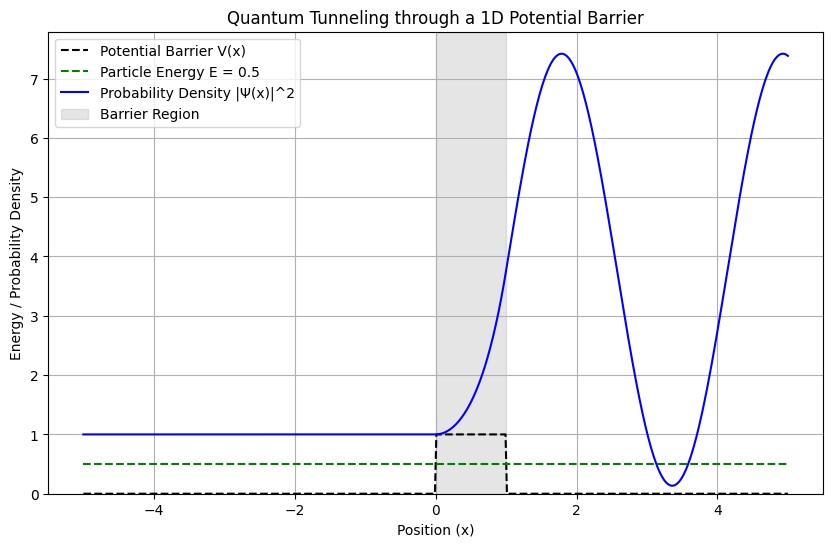

Simulation complete. Observe the non-zero probability density on the right side of the barrier,
indicating that the particle has 'tunneled' through it, even though its energy is less than the barrier height.


In [21]:
# Simulation parameters
x_start = -5.0
x_end = 5.0
n_points = 500
x = np.linspace(x_start, x_end, n_points)

# Particle energy (E) - choose less than barrier height for tunneling
E_particle = 0.5 # Energy of the incoming particle

# Define the potential barrier V(x)
barrier_height = 1.0 # V0
barrier_start = 0.0
barrier_end = 1.0

V = np.zeros(n_points)
# Create a square barrier
for i, val_x in enumerate(x):
    if barrier_start <= val_x <= barrier_end:
        V[i] = barrier_height


# --- 3. Solving the Schrödinger Equation Numerically ---

# Initial conditions (representing a plane wave from the left)
# psi(x) = A * e^(ikx) + B * e^(-ikx)
# For an incident wave from the left, assume A=1, B=0 (initially far left)
# We choose k = sqrt(2mE)/hbar for E > V
k_incident = np.sqrt(2 * m * E_particle) / hbar

# The initial wave function at x_start (far left) is e^(ikx)
# The initial derivative is i * k * e^(ikx)
# We'll set the amplitude of the incoming wave to 1 (A=1).

# Ensure initial conditions are at a point where V=0 (before the barrier)
# Choose x0 slightly to the left of the barrier start
x0_index = np.where(x < barrier_start - 0.1)[0][-1] # Find an index safely before barrier
x0 = x[x0_index]

inital_psi = np.exp(1j * k_incident * x0) # Psi at x0
inital_dpsi_dx = 1j * k_incident * inital_psi # Derivative at x0

# for odeint, we need real inital conditions. We solve for real and imag parts seperately.
# psi = psi_real + i * psi_imag
# d(psi) / dx = d(dpsi_real) / dx + i * d(dpsi_imag) / dx
# d^2(psi) / dx^2 = d^2(psi_real) / dx^2 + i * d^2(psi_imag) / dx^2

# Split initial complex conditions into real and imaginary parts
psi_initial_real  = [inital_psi.real, inital_dpsi_dx.real]
psi_initial_imag = [inital_psi.imag, inital_dpsi_dx.imag]

# --- CORRECTED odeint CALLS ---
# Now, args includes E_particle, the full V array, AND the full x array (x_points_array)
sol_real = odeint(schrodinger_with_barrier, psi_initial_real, x, args=(E_particle, V, x))
sol_imag = odeint(schrodinger_with_barrier, psi_initial_imag, x, args=(E_particle, V, x))

# Reconstruct the complex wave function
psi_solution = sol_real[:, 0] + 1j * sol_imag[:, 0]

# --- 4. Plotting the Results ---
# Calculate probability density |\Psi(x)|^2
probability_density = np.abs(psi_solution)**2

plt.figure(figsize=(10, 6))
plt.plot(x, V, 'k--', label='Potential Barrier V(x)')
plt.plot(x, np.full_like(x, E_particle), 'g--', label=f'Particle Energy E = {E_particle}')
plt.plot(x, probability_density, 'b-', label='Probability Density |Ψ(x)|^2')

# Highlight the tunneling region
plt.axvspan(barrier_start, barrier_end, color='gray', alpha=0.2, label='Barrier Region')

plt.title('Quantum Tunneling through a 1D Potential Barrier')
plt.xlabel('Position (x)')
plt.ylabel('Energy / Probability Density')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.show()

print("Simulation complete. Observe the non-zero probability density on the right side of the barrier,")
print("indicating that the particle has 'tunneled' through it, even though its energy is less than the barrier height.")




In [17]:
(E_particle, V)

(0.5,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
      

500